<a href="https://colab.research.google.com/github/chuqasmi/GEN-AI-/blob/main/Copy_of_booksrecommd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**#GNN Applications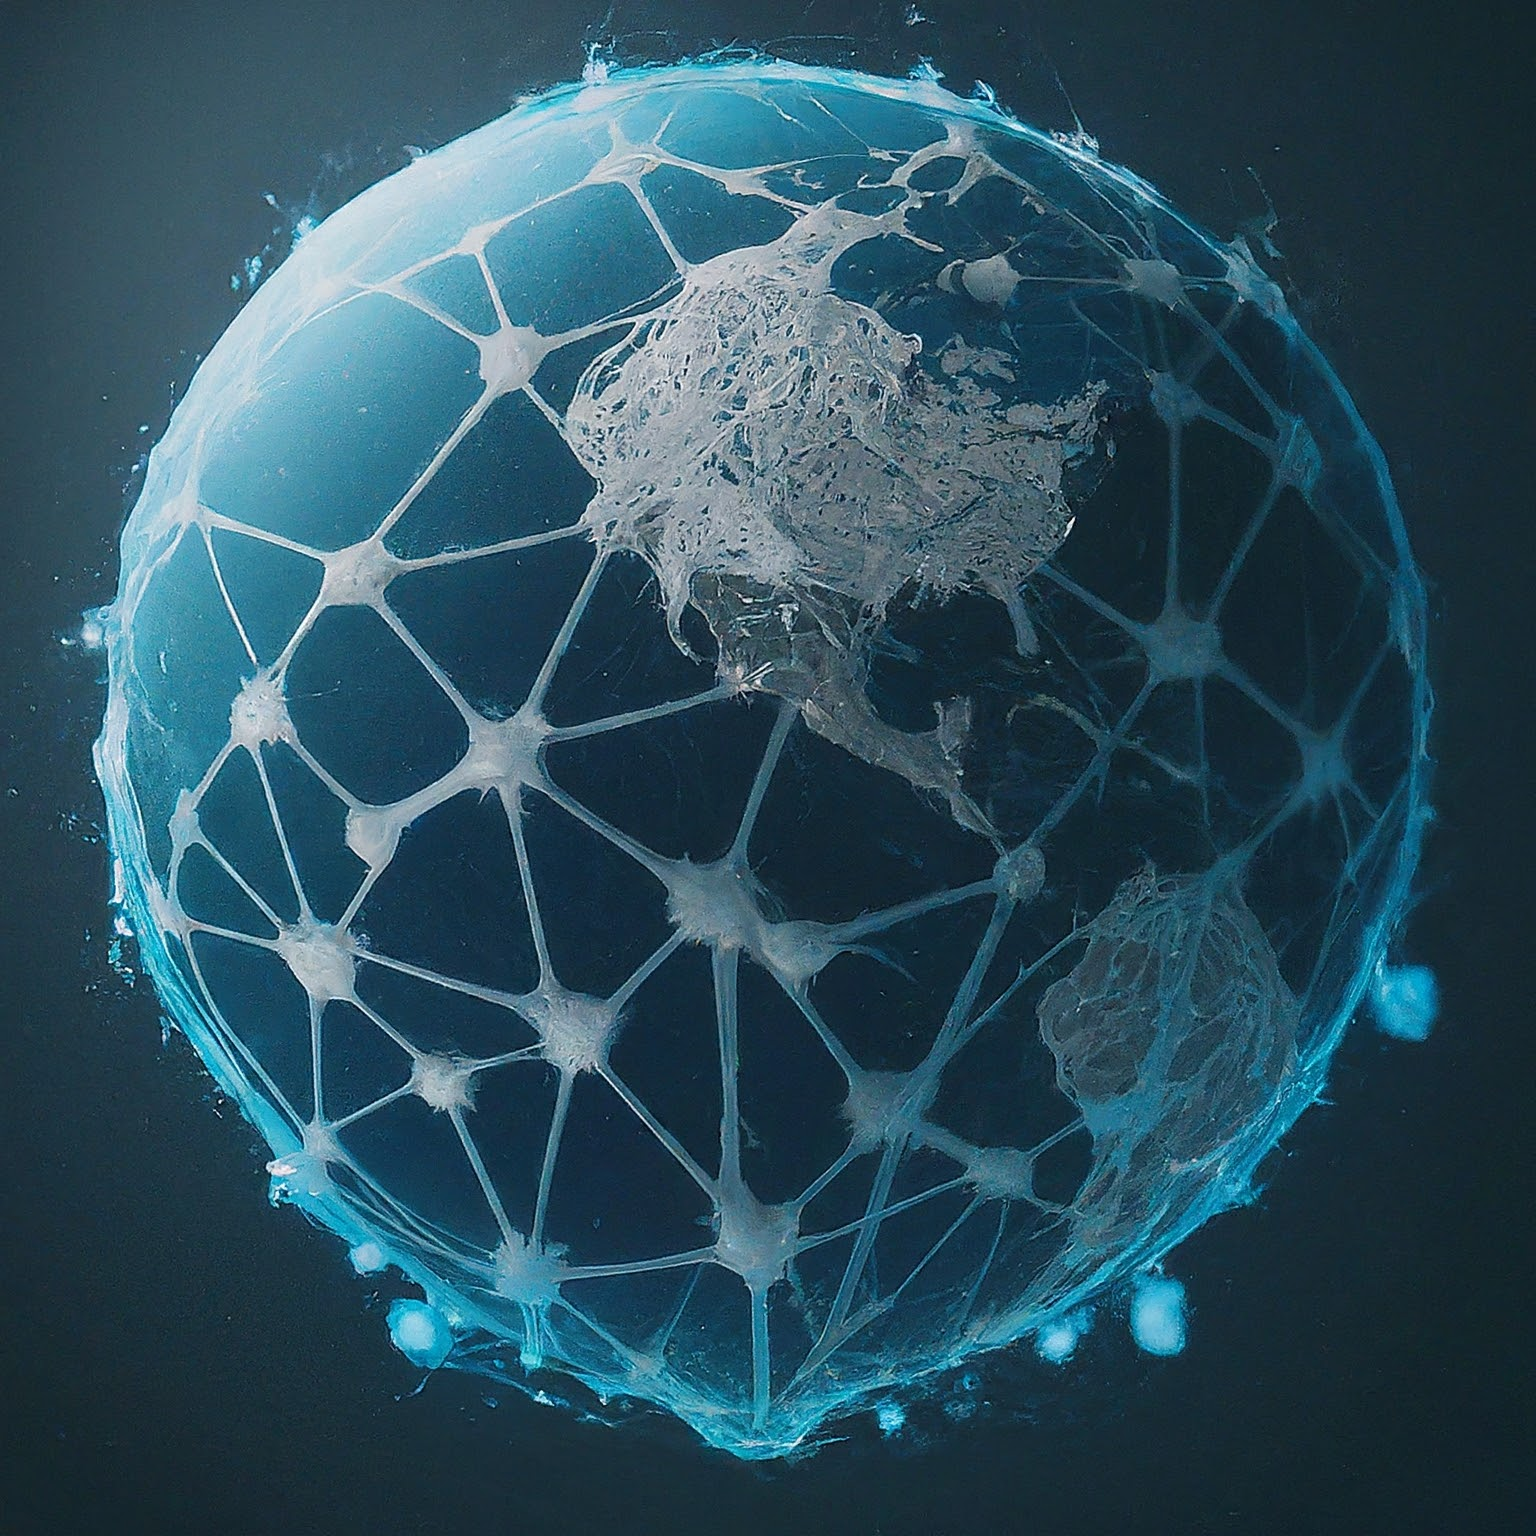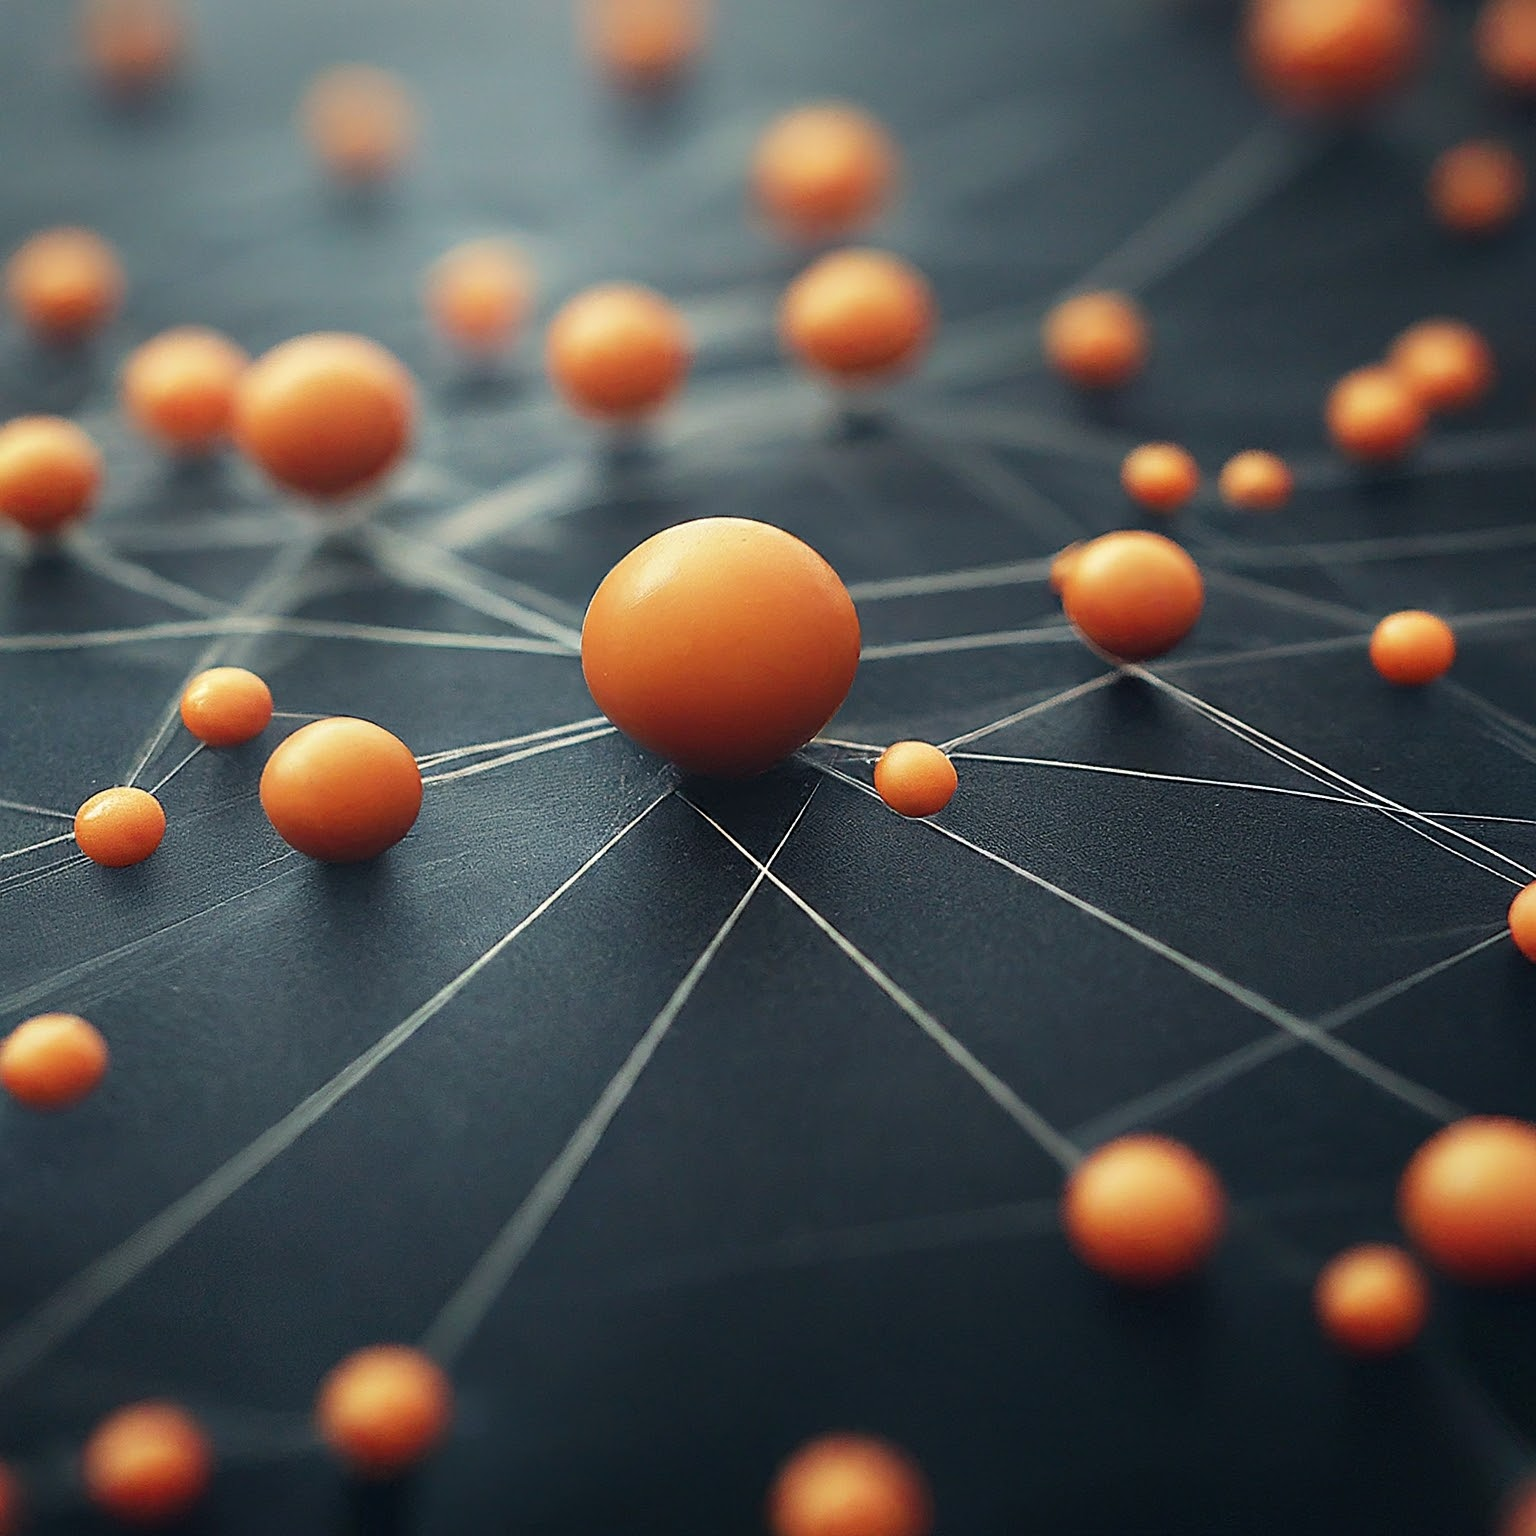**

In [ ]:
import torch
import torch.nn as nn
import random
import pickle
import numpy as np
from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 599.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 59.7 MB/s eta 0:00:00
Looking in links: 

Processing...
Done!


Dataset: Cora():
Number of graphs: 1
Number of features: 1433
Number of classes: 7
GCN - Epoch: 001, Loss: 1.9463, Val: 0.2880, Test: 0.2700
GCN - Epoch: 002, Loss: 1.9409, Val: 0.2580, Test: 0.2910
GCN - Epoch: 003, Loss: 1.9343, Val: 0.2560, Test: 0.2910
GCN - Epoch: 004, Loss: 1.9275, Val: 0.2640, Test: 0.3210
GCN - Epoch: 005, Loss: 1.9181, Val: 0.3220, Test: 0.3630
GCN - Epoch: 006, Loss: 1.9086, Val: 0.4000, Test: 0.4120
GCN - Epoch: 007, Loss: 1.9015, Val: 0.3900, Test: 0.4010
GCN - Epoch: 008, Loss: 1.8933, Val: 0.3900, Test: 0.4020
GCN - Epoch: 009, Loss: 1.8808, Val: 0.4220, Test: 0.4180
GCN - Epoch: 010, Loss: 1.8685, Val: 0.4560, Test: 0.4470
GCN - Epoch: 011, Loss: 1.8598, Val: 0.4760, Test: 0.4680
GCN - Epoch: 012, Loss: 1.8482, Val: 0.5120, Test: 0.5180
GCN - Epoch: 013, Loss: 1.8290, Val: 0.5380, Test: 0.5440
GCN - Epoch: 014, Loss: 1.8233, Val: 0.5580, Test: 0.5720
GCN - Epoch: 015, Loss: 1.8057, Val: 0.5820, Test: 0.5910
GCN - Epoch: 016, Loss: 1.7966, Val: 0.6060, Te

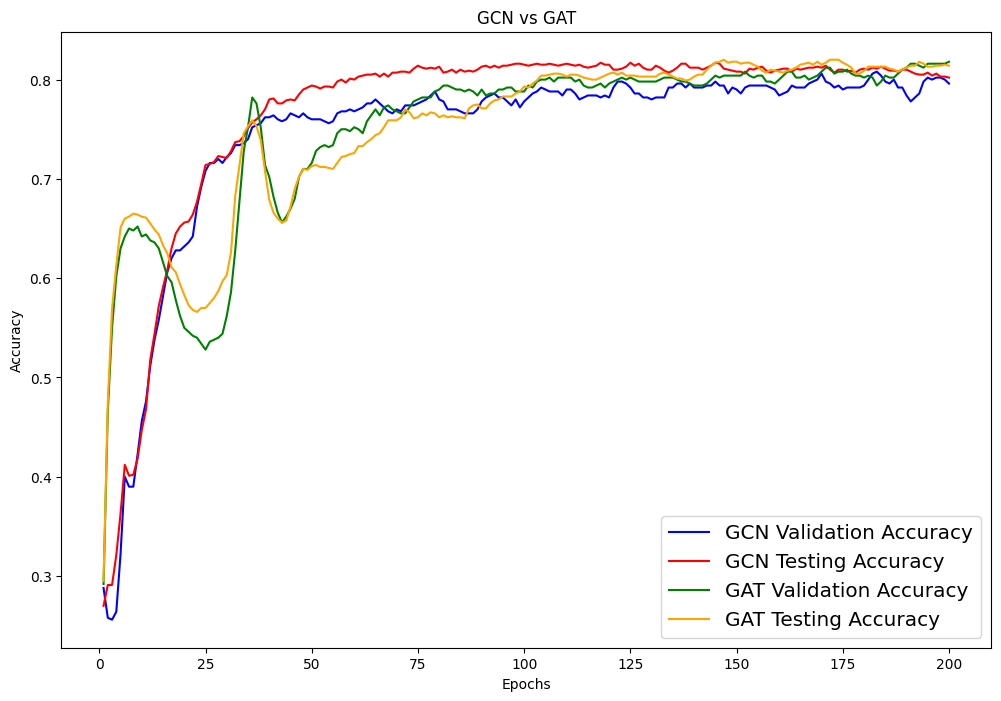

In [ ]:
# Install necessary packages
!pip install -q torch
!pip install torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install git+https://github.com/pyg-team/pytorch_geometric.git

import os
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from torch_geometric.datasets import Planetoid
from torch_geometric.transforms import NormalizeFeatures
from torch_geometric.nn import GCNConv, GATConv
import torch.nn.functional as F

# Set seed for reproducibility
torch.manual_seed(1234567)

# Load dataset
dataset = Planetoid(root='data/Planetoid', name='Cora', transform=NormalizeFeatures())

print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

data = dataset[0]  # Get the first graph object

# Define GCN model
class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        self.conv1 = GCNConv(dataset.num_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, dataset.num_classes)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        return x

# Define GAT model
class GAT(torch.nn.Module):
    def __init__(self, hidden_channels, heads):
        super().__init__()
        self.conv1 = GATConv(dataset.num_features, hidden_channels, heads=heads)
        self.conv2 = GATConv(hidden_channels * heads, dataset.num_classes, heads=heads)

    def forward(self, x, edge_index):
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv1(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        return x

# Visualize function
def visualize(h, color):
    z = TSNE(n_components=2).fit_transform(h.detach().cpu().numpy())

    plt.figure(figsize=(10, 10))
    plt.xticks([])
    plt.yticks([])

    plt.scatter(z[:, 0], z[:, 1], s=70, c=color, cmap="Set2")
    plt.show()

# Train function for GCN
def train_gcn(model, optimizer, criterion, data):
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = criterion(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()

# Test function for GCN
def test_gcn(model, data, mask):
    model.eval()
    out = model(data.x, data.edge_index)
    pred = out.argmax(dim=1)
    correct = pred[mask] == data.y[mask]
    acc = int(correct.sum()) / int(mask.sum())
    return acc

# Train function for GAT
def train_gat(model, optimizer, criterion, data):
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = criterion(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()

# Test function for GAT
def test_gat(model, data, mask):
    model.eval()
    out = model(data.x, data.edge_index)
    pred = out.argmax(dim=1)
    correct = pred[mask] == data.y[mask]
    acc = int(correct.sum()) / int(mask.sum())
    return acc

# Instantiate GCN model
gcn_model = GCN(hidden_channels=16)

# Define GCN optimizer and criterion
gcn_optimizer = torch.optim.Adam(gcn_model.parameters(), lr=0.01, weight_decay=5e-4)
gcn_criterion = torch.nn.CrossEntropyLoss()

# Train GCN
gcn_val_acc_all = []
gcn_test_acc_all = []
for epoch in range(1, 201):
    gcn_loss = train_gcn(gcn_model, gcn_optimizer, gcn_criterion, data)
    gcn_val_acc = test_gcn(gcn_model, data, data.val_mask)
    gcn_test_acc = test_gcn(gcn_model, data, data.test_mask)
    gcn_val_acc_all.append(gcn_val_acc)
    gcn_test_acc_all.append(gcn_test_acc)
    print(f'GCN - Epoch: {epoch:03d}, Loss: {gcn_loss:.4f}, Val: {gcn_val_acc:.4f}, Test: {gcn_test_acc:.4f}')

# Instantiate GAT model
gat_model = GAT(hidden_channels=8, heads=8)

# Define GAT optimizer and criterion
gat_optimizer = torch.optim.Adam(gat_model.parameters(), lr=0.005, weight_decay=5e-4)
gat_criterion = torch.nn.CrossEntropyLoss()

# Train GAT
gat_val_acc_all = []
gat_test_acc_all = []
for epoch in range(1, 201):
    gat_loss = train_gat(gat_model, gat_optimizer, gat_criterion, data)
    gat_val_acc = test_gat(gat_model, data, data.val_mask)
    gat_test_acc = test_gat(gat_model, data, data.test_mask)
    gat_val_acc_all.append(gat_val_acc)
    gat_test_acc_all.append(gat_test_acc)
    print(f'GAT - Epoch: {epoch:03d}, Loss: {gat_loss:.4f}, Val: {gat_val_acc:.4f}, Test: {gat_test_acc:.4f}')

# Plot validation and test accuracies for both models
plt.figure(figsize=(12, 8))
plt.plot(np.arange(1, len(gcn_val_acc_all) + 1), gcn_val_acc_all, label='GCN Validation Accuracy', c='blue')
plt.plot(np.arange(1, len(gcn_test_acc_all) + 1), gcn_test_acc_all, label='GCN Testing Accuracy', c='red')
plt.plot(np.arange(1, len(gat_val_acc_all) + 1), gat_val_acc_all, label='GAT Validation Accuracy', c='green')
plt.plot(np.arange(1, len(gat_test_acc_all) + 1), gat_test_acc_all, label='GAT Testing Accuracy', c='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('GCN vs GAT')
plt.legend(loc='lower right', fontsize='x-large')
plt.savefig('gcn_vs_gat_accuracy.png')
plt.show()
